In [1]:
import pandas as pd
import matplotlib.pyplot as plt


/home/denis/UBUNTU_TEST/HitWarrior/zReportReader/infoPlotter.py:170: OptimizeWarning: Covariance of the parameters could not be estimated
  pars, cov = curve_fit(f, self.track_sizes, d)
/home/denis/UBUNTU_TEST/HitWarrior/zReportReader/infoPlotter.py:170: OptimizeWarning: Covariance of the parameters could not be estimated
  pars, cov = curve_fit(f, self.track_sizes, d)


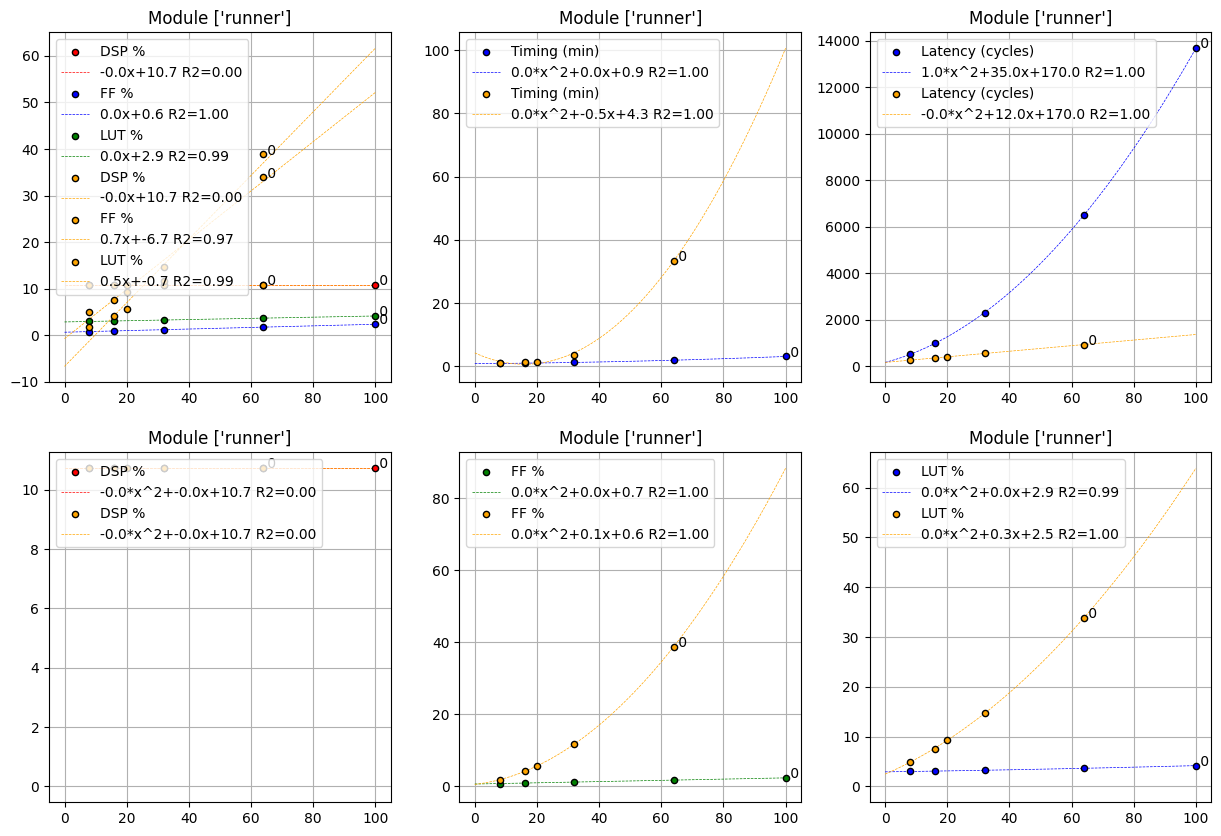

In [4]:
from infoPlotter import TrackVSPlot

fig, ax = plt.subplots(2,3, figsize=(15,10))
axRes = ax[0,0]
axLat = ax[0,1]
axComp = ax[0,2]
axDSP = ax[1,0]
axFF = ax[1,1]
axLUT = ax[1,2]

TrackVSPlot("./data/July10_1_data/", ["runner"], 0)\
  .setup_resources(colors=["red", "blue", "green"], fits=["linear", "linear", "linear"], ax=axRes)\
  .setup_latency(colors=["blue"], fits=["quad"], ax=axLat)\
  .setup_compile(colors=["blue"], fits=["quad"], ax=axComp)\
  .setup(name="DSP", colors=["red"], fits=["quad"], ax=axDSP, selections=["DSP %"])\
  .setup(name="FF", colors=["green"], fits=["quad"], ax=axFF, selections=["FF %"])\
  .setup(name="LUT", colors=["blue"], fits=["quad"], ax=axLUT, selections=["LUT %"])\
  .plot()

TrackVSPlot("./data/July11_1_data/", ["runner"], 0)\
  .setup_resources(colors=["orange", "orange", "orange"], fits=["linear", "linear", "linear"], ax=axRes)\
  .setup_latency(colors=["orange"], fits=["quad"], ax=axLat, ylims=[0,5])\
  .setup_compile(colors=["orange"], fits=["quad"], ax=axComp)\
  .setup(name="DSP", colors=["orange"], fits=["quad"], ax=axDSP, selections=["DSP %"])\
  .setup(name="FF", colors=["orange"], fits=["quad"], ax=axFF, selections=["FF %"])\
  .setup(name="LUT", colors=["orange"], fits=["quad"], ax=axLUT, selections=["LUT %"])\
  .plot()